In [66]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error, r2_score as r2

df = pd.read_csv('TestForClean.csv', sep=';')
df.head()

,Price,IsNew,Color,City,Year
0,44.0,Yes,Red,Moscow,1990
1,35.0,No,Blue,NaN,1954
2,50.0,No,Yellow,NaN,1977
3,12.0,Yes,Orange,NaN,1963
4,38.0,No,Red,NaN,1987


In [12]:
# замена пропусков на Nan 
df['Year'] = df['Year'].replace('unknown', np.NaN)
df['Year'].unique()

array(['1990', '1954', '1977', '1963', '1987', '1973', '1962', '1960',
       '1964', '1961', '1959', '1981', '1986', '1967', '1955', '1989',
       '1957', '1950', '1983', '1972', '1978', '1952', '1958', '1975',
       '1974', '1966', '1970', '1956', '1984', '1976', '1980', '1968',
       '1971', '1953', '1969', '1988', '1951', nan, '[1965]', '[1971]',
       '[1964]'], dtype=object)

In [14]:
# удаление ненужных символов 
df['Year'] = df['Year'].str.strip('[]')
df['Year'].unique()

array(['1990', '1954', '1977', '1963', '1987', '1973', '1962', '1960',
       '1964', '1961', '1959', '1981', '1986', '1967', '1955', '1989',
       '1957', '1950', '1983', '1972', '1978', '1952', '1958', '1975',
       '1974', '1966', '1970', '1956', '1984', '1976', '1980', '1968',
       '1971', '1953', '1969', '1988', '1951', nan, '1965'], dtype=object)

In [15]:
df['Year'].dtype

dtype('O')

In [16]:
# замена пропусков
df['Year'] = df['Year'].fillna(0)

In [17]:
# изменениетипа столбца
df['Year'] = df['Year'].astype('int')
df['Year'].dtype

dtype('int64')

In [18]:
# поиск колонок с пропущенными значниями
df.isna().mean() * 100

Price     5.0
IsNew     0.0
Color     0.0
City     82.0
Year      0.0
dtype: float64

In [21]:
# удаляем колонки с пропусками более 50%
for col in df.columns:
  if df[col].isnull().mean() > 0.5:
    df = df.drop(col, axis = 1)

df.head()

,Price,IsNew,Color,Year
0,44.0,Yes,Red,1990
1,35.0,No,Blue,1954
2,50.0,No,Yellow,1977
3,12.0,Yes,Orange,1963
4,38.0,No,Red,1987


In [23]:
# заполение пропусков
df['Price'] = df['Price'].fillna(df['Price'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
 1   IsNew   100 non-null    object 
 2   Color   100 non-null    object 
 3   Year    100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


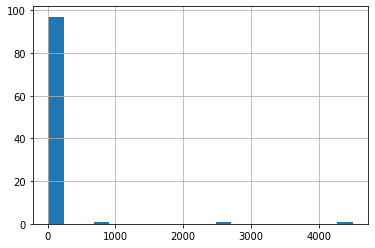

In [24]:
# поиск аномалий
df['Price'].hist(bins = 20);

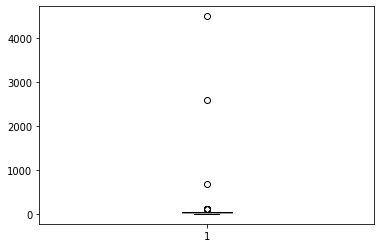

In [26]:
plt.boxplot(df['Price'])
plt.show()

In [27]:
df['Price'].describe()

count     100.000000
mean      114.673684
std       516.075780
min        10.000000
25%        25.000000
50%        36.000000
75%        46.000000
max      4500.000000
Name: Price, dtype: float64

In [31]:
# удаляем аномальные значения
min = df['Price'].quantile(0.25) - 1.5*(df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
max = df['Price'].quantile(0.75) + 1.5*(df['Price'].quantile(0.75) - df['Price'].quantile(0.25))

In [32]:
min

-6.5

In [33]:
max

77.5

In [34]:
df = df[df['Price'].between(min, max)]

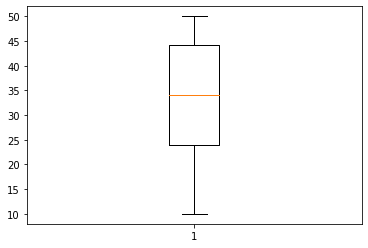

In [35]:
plt.boxplot(df['Price'])
plt.show()

In [36]:
# обработка категориальных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 96
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   92 non-null     float64
 1   IsNew   92 non-null     object 
 2   Color   92 non-null     object 
 3   Year    92 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB


In [37]:
df['IsNew'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
dic = {'Yes': 1, 'No': 0}
df['IsNew'] = df['IsNew'].map(dic)
df['IsNew'].unique()

array([1, 0])

In [39]:
df['Color'].unique()

array(['Red', 'Blue', 'Yellow', 'Orange'], dtype=object)

In [40]:
df = pd.get_dummies(df, columns = ['Color'], prefix = 'color_')
df.head()

,Price,IsNew,Year,color__Blue,color__Orange,color__Red,color__Yellow
0,44.0,1,1990,0,0,1,0
1,35.0,0,1954,1,0,0,0
2,50.0,0,1977,0,0,0,1
3,12.0,1,1963,0,1,0,0
4,38.0,0,1987,0,0,1,0


# 2. Машинное обучение

In [41]:
boston_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [42]:
type(boston_data)

sklearn.utils.Bunch

In [43]:
x = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
y = boston_data['target']

x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [45]:
x.shape

(506, 13)

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


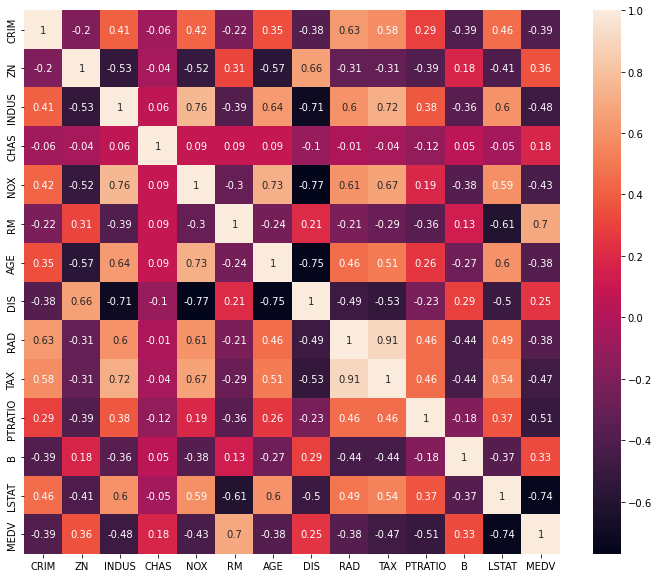

In [48]:
corr = x.copy()
corr['MEDV'] = y
corr_matx = corr.corr().round(2)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matx, annot=True);

In [52]:
x_new = x[['RM','LSTAT']].copy()

In [53]:
x_train, x_test, y_train, y_test = tts(x_new, y, test_size = 0.15, random_state = 5)

In [54]:
x_train.shape

(430, 2)

In [55]:
x_test.shape

(76, 2)

In [56]:
x_train.describe()

,RM,LSTAT
count,430.000000,430.000000
mean,6.284507,12.527837
std,0.694611,6.957210
min,3.561000,1.730000
25%,5.881000,6.942500
50%,6.208500,11.330000
75%,6.618250,16.930000
max,8.780000,37.970000


In [60]:
tr = MinMaxScaler()

x_train_sc = tr.fit_transform(x_train)
x_test_sc = tr.transform(x_test)

x_train_sc = pd.DataFrame(x_train_sc, index = x_train.index, columns= x_train.columns)
x_test_sc = pd.DataFrame(x_test_sc, index = x_test.index, columns= x_test.columns)

In [61]:
x_train_sc.describe()

,RM,LSTAT
count,430.000000,430.000000
mean,0.521845,0.297954
std,0.133093,0.191976
min,0.000000,0.000000
25%,0.444530,0.143833
50%,0.507281,0.264901
75%,0.585792,0.419426
max,1.000000,1.000000


In [62]:
regr = LinearRegression()
regr.fit(x_train_sc, y_train)

LinearRegression()

In [68]:
pred_train = regr.predict(x_train_sc)
pred_test = regr.predict(x_test_sc)

print('MAE train:', mae(y_train, pred_train))
print('MAE test:', mae(y_test, pred_test))

print('R2 train:', r2(y_train, pred_train))
print('R2 test:', r2(y_test, pred_test))

MAE train: 3.994914204041432
MAE test: 3.799602003777304
R2 train: 0.6365708302470361
R2 test: 0.6389436547840108


In [69]:
y_train.mean()

22.58372093023256

In [70]:
3.99 / 22.58372093023256

0.17667593450725982

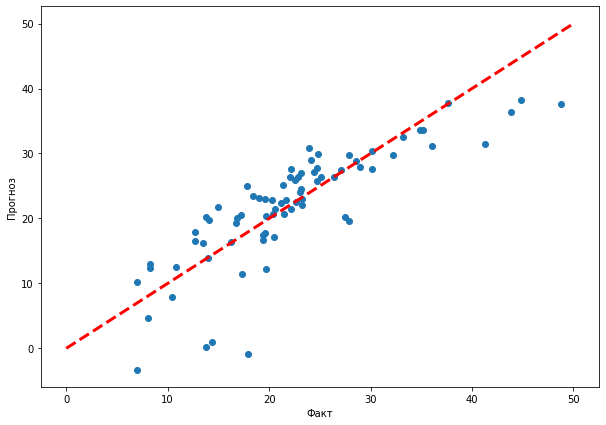

In [73]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, pred_test)
plt.plot([0,50], [0, 50], '--k', color='red', linewidth=3)
plt.xlabel('Факт')
plt.ylabel('Прогноз')
plt.show()